In [2]:
using Revise
using NonEquilibriumGreenFunction
using HssMatrices
using LinearAlgebra
using Makie
using CairoMakie
using StaticArrays

In [3]:
module Junction 
using Revise
using NonEquilibriumGreenFunction
using LinearAlgebra
    struct Parameters
        δt::Float64 #timestep
        T::Float64  #simulation length
        Γl::Float64 #left tunneling rate
        Γr::Float64 #right tunneling rate
        β::Float64  #inverse temperature
        ϕl::Vector{Float64} # left phase
        ϕr::Vector{Float64}  # right phase
    end
    default_compression() = HssCompression(leafsize = 32)
    function Parameters( ; δt, T, Γl = 1, Γr = 1, β=1, ϕl, ϕr )
        return Parameters(δt, T, Γl, Γr, β, ϕl, ϕr)
    end
    function lead_Σ_R_left(p::Parameters)
         axis = 0:p.δt:p.T
         dirac_kernel(TrapzDiscretisation,Retarded(),axis,t ->  -1im*p.Γl, compression = default_compression())
    end
    function lead_Σ_R_right(p::Parameters) 
        axis = 0:p.δt:p.T
        dirac_kernel(TrapzDiscretisation,Retarded(),axis,t ->  -1im*p.Γr, compression = default_compression())
    end
    function dot_g_R(p::Parameters) 
        axis = 0:p.δt:p.T
        discretize_retardedkernel(axis,(t,tp) ->  ComplexF64(-1im) , compression = default_compression())
    end
end

Main.Junction

In [4]:
p = Junction.Parameters(δt = 0.1,T = 10,ϕl = zeros(1000),ϕr = zeros(1000));
Σ_R_right = Junction.lead_Σ_R_right(p)
Σ_L_left = Junction.lead_Σ_R_left(p)
Σ = Σ_L_left + Σ_R_right
g = Junction.dot_g_R(p);

In [5]:
K = g*Σ
G = solve_dyson(g,g*Σ)

Kernel{TrapzDiscretisation{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, HssMatrix{ComplexF64}, HssCompression{Float64, Int64}}, Retarded}(TrapzDiscretisation{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, HssMatrix{ComplexF64}, HssCompression{Float64, Int64}}(0.0:0.1:10.0, ComplexF64[0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -2.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; -1.9999999999999962 + 2.796057710810501e-16im -1.9999999999999962 + 3.203694450134786e-16im … 0.0 + 0.0im 0.0 + 0.0im; -1.9999999999999962 + 3.0168598608305594e-16im -1.9999999999999962 + 3.424496600154844e-16im … -2.0 + 0.0im 0.0 + 0.0im], 1, HssCompression{Float64, Int64}(1.0e-6, 1.0e-6, 20, 32)), Retarded())

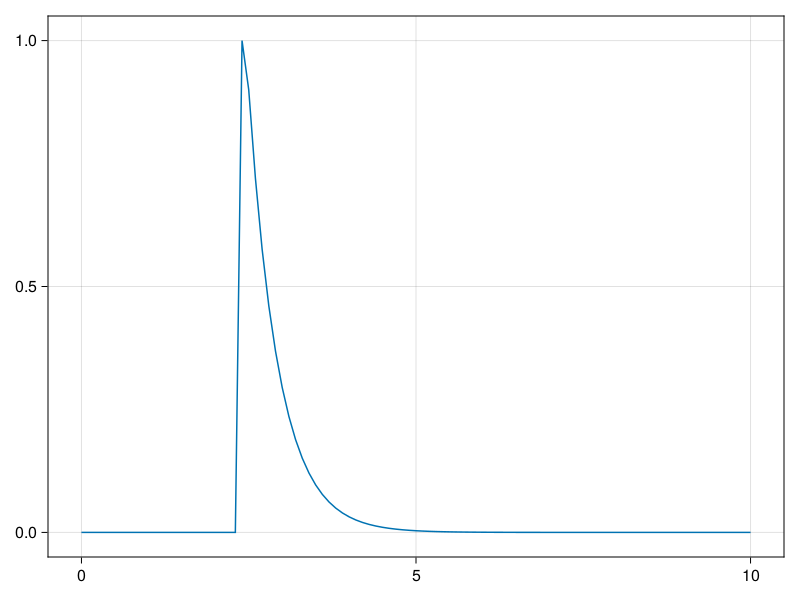

In [9]:
function _plot(G)
    ax = 0:p.δt:p.T |> collect
    data = reshape(abs.(vcat(discretization(G)[:,25]...)),:)
    lines(ax,data)
end
_plot(G)